<a href="https://colab.research.google.com/github/adarshmodh/Deep-Learning-Assignments/blob/master/ESE546_HW1_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#only for the first time to setup your gdrive storage
import os
from google.colab import drive

# Mount google drive
DRIVE_MOUNT='/content/gdrive'
drive.mount(DRIVE_MOUNT)


# create folder to write data to
ESE546_FOLDER=os.path.join(DRIVE_MOUNT, 'My Drive', 'ESE546_2019')
HOMEWORK_FOLDER=os.path.join(ESE546_FOLDER, 'HW1')
os.makedirs(HOMEWORK_FOLDER, exist_ok=True)

In [2]:
#just mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Problem 1 **MNIST**

In [4]:
# Creating dataset
from pathlib import Path
import random
import torch
from torchvision import datasets, transforms

data_folder = Path("/content/gdrive/My Drive/ESE546_2019/HW1")

transform = transforms.Compose(
        [transforms.ToTensor(),
        transforms.Normalize(mean=[0.0],std=[1.0])])

trainset = datasets.MNIST(data_folder / "MNIST_data/", download=True, train=True, transform=transform)
valset = datasets.MNIST(data_folder / "MNIST_data/", download=True, train=False, transform=transform)


num_traindata = 30016
num_testdata = 5024

train_sampler = torch.utils.data.sampler.WeightedRandomSampler(weights=[1.0]*num_traindata,num_samples=num_traindata , replacement=False)
test_sampler = torch.utils.data.sampler.WeightedRandomSampler(weights=[1.0]*num_testdata,num_samples=num_testdata , replacement=False)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, sampler = train_sampler)
valloader = torch.utils.data.DataLoader(valset, batch_size=32, sampler = test_sampler)
print(len(trainloader),len(valloader))

938 157


In [0]:
import numpy as np

def softmax(x):
  exps = np.exp(x - np.max(x))
  return exps/np.sum(exps)

class linear_t:
  def __init__(self, cin, cout, bias=True):
    # initialize to appropriate sizes, fill with Gaussian entires
    # normalize everything to make the Frobenius norm of w, b is 1
    self.w = np.random.normal(loc=0.0,scale = np.sqrt(2/(cin+cout)),size=(cin,cout))
    # self.w = 0.01 * np.random.randn(cin,cout)
    self.b = np.zeros(cout)
    self.dw, self.db = 0.0,0.0
    # print(self.w.shape, self.b.shape) 

  def forward(self, x):
    self.x = x
    y = np.matmul(x, self.w) + self.b 
    return y

  def backward(self, dy):
    m = self.x.shape[1]

    dx = np.matmul(dy, self.w.T)
    dw = np.matmul(self.x.T , dy) / m 
    db = np.sum(dy, axis=1, keepdims=True) / m

    self.dw, self.db = dw, db
    # notice that there is no need to cache dhˆl
    return dx
  
  def zero_grad(self):
    # useful to delete the stored backprop gradients of the
    # previous mini-batch before you start a new mini-batch
    self.dw, self.db = 0*self.dw, 0*self.db

class relu_t:
  def __init__(self):
    pass
  def forward(self,x):
    self.x = x
    y = np.maximum(0,x)
    return y  

  def backward(self, dy):
    dx = np.array(dy, copy = True)
    dx[self.x <= 0] = 0;
    return dx
    
class softmax_cross_entropy_t:
  def __init__(self):
    # no parameters, nothing to initialize
    pass
  
  def forward(self, x, y_true):
    self.x = x
    m = y_true.shape[0]
    
    #softmax
    probs = softmax(x)

    # # cross entropy loss
    # log_likelihood = -np.log(probs[range(m),y_true])
    # loss = np.sum(log_likelihood) / m

    # # better cross entropy
    y_hat = x[range(m),y_true]
    loss = -y_hat + np.log(np.sum(np.exp(x), axis=-1))
    loss = loss.sum()/m

    #error
    y_hat = np.argmax(probs.copy(), axis = 1)
    positives = np.sum(y_hat == y_true)
    error = (m-positives)/m
    
    self.y_true = y_true
    return loss, error
  
  def backward(self):
    # as we saw in the notes, the backprop input to the
    # loss layer is 1, so this function does not take any
    # arguments
    m = self.y_true.shape[0]
    y_true = self.y_true
    x = self.x

    # grad = softmax(x)
    # grad[range(m),y_true] -= 1
    # grad = grad/m 
    # return grad

    ones_y_hat = np.zeros_like(x)
    ones_y_hat[np.arange(len(x)),y_true] = 1
    softmax = np.exp(x) / np.exp(x).sum(axis=-1,keepdims=True)
    return (- ones_y_hat + softmax) / m


Epoch 0, Iteration:30016 - Training loss: 2.2481070068584073, Error: 0.8395189232409381
Epoch 1, Iteration:60032 - Training loss: 2.004345859318564, Error: 0.6026785714285714
Epoch 2, Iteration:90048 - Training loss: 1.7718802273721235, Error: 0.4210754264392324
Epoch 3, Iteration:120064 - Training loss: 1.5792051783019678, Error: 0.3396521855010661
Epoch 4, Iteration:150080 - Training loss: 1.42647847988556, Error: 0.2915445095948827
Epoch 5, Iteration:180096 - Training loss: 1.3058589973032027, Error: 0.2615271855010661
Epoch 6, Iteration:210112 - Training loss: 1.208971658734665, Error: 0.24037180170575692
Epoch 7, Iteration:240128 - Training loss: 1.1299169264465727, Error: 0.2256130063965885
Epoch 8, Iteration:270144 - Training loss: 1.0643842618836243, Error: 0.2137193496801706
Epoch 9, Iteration:300160 - Training loss: 1.0093060914942293, Error: 0.20519056503198294
Epoch 10, Iteration:330176 - Training loss: 0.9624089090539109, Error: 0.19749466950959488
Epoch 11, Iteration:3601

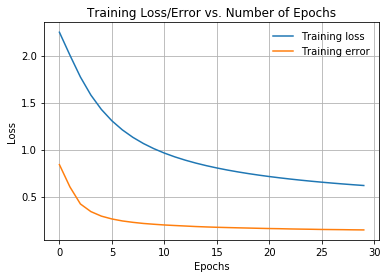

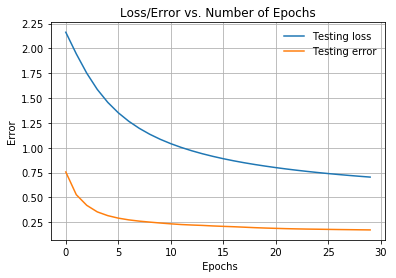

In [0]:
import matplotlib.pyplot as plt

cin = 784
cout = 10
l1, l2, l3 = linear_t(cin,cout), relu_t(), softmax_cross_entropy_t()
net = [l1, l2, l3]

lr = 0.3
epochs = 30
t = 0

training_loss_plot=[]
training_error_plot=[]
testing_loss_plot=[]
testing_error_plot=[]


for e in range(epochs):
    running_loss = 0.0
    running_error = 0

    #Training 
    for images, labels in trainloader:
        t+=32
        x, y = images.flatten(1).numpy(), labels.numpy()
        # print(x.shape, y.shape)
        # zeroing out gradient for linear layer 
        l1.zero_grad()
        
        # 3.forward pass
        # loss,error = forward_pass(net, x, y)
        h1 = l1.forward(x)
        h2 = l2.forward(h1)
        loss,error = l3.forward(h2,y)
        # print(t, loss, error)
        
        # 4. backward pass
        # dw, db, w, b = backward_pass(net)
        dh2 = l3.backward()
        dh1 = l2.backward(dh2)
        dx = l1.backward(dh1)
        dw, db = l1.dw, l1.db
        # print(t, np.linalg.norm(dw/l1.w), np.linalg.norm(db/l1.b))
        
        # 5. one step of SGD
        l1.w = l1.w - lr*dw
        l1.b = l1.b - lr*db 

        running_loss += loss
        running_error += error


    training_loss_plot.append(running_loss/len(trainloader))
    training_error_plot.append(running_error/len(trainloader))
    print("Epoch {}, Iteration:{} - Training loss: {}, Error: {}".format(e,t, running_loss/len(trainloader), running_error/len(trainloader)))

    #validate after very epoch
    val_running_loss = 0.0
    val_running_error = 0.0
    for images, labels in valloader:
      x, y = images.flatten(1).numpy(), labels.numpy()
      # print(x.shape, y.shape)
    
      h1 = l1.forward(x)
      h2 = l2.forward(h1)
      loss,error = l3.forward(h2,y)
      val_running_loss+=loss
      val_running_error+=error

    testing_loss_plot.append(val_running_loss/len(valloader))
    testing_error_plot.append(val_running_error/len(valloader))


plt.figure(1)
plt.title("Training Loss/Error vs. Number of Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(training_loss_plot, label='Training loss')
plt.plot(training_error_plot, label='Training error')
plt.legend(frameon=False)
plt.grid()
plt.show() 

plt.figure(2)
plt.title("Loss/Error vs. Number of Epochs")
plt.xlabel(" Epochs")
plt.ylabel("Error")
plt.plot(testing_loss_plot, label='Testing loss')
plt.plot(testing_error_plot, label='Testing error')
plt.legend(frameon=False)
plt.grid()
plt.show()         

# Using Pytorch

In [11]:
import torch
from torch import nn
from torch import optim
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cin, cout = 784, 10

model = torch.nn.Sequential(
    torch.nn.Linear(cin, cout, bias=True),
    torch.nn.ReLU(),
    torch.nn.LogSoftmax(dim=1)
).to(device)

loss_criterion = torch.nn.NLLLoss(reduction='mean')

learning_rate = 0.2
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

training_loss=[]
training_acc=[]

validation_loss = []
validation_acc = []


epochs = 30
for e in range(epochs):
    running_loss = 0.0
    running_acc = 0

    #Training 
    for images, labels in trainloader:
        images,labels = images.flatten(1).to(device), labels.to(device)
        # print(images.shape,labels.shape)
        optimizer.zero_grad()        
        output = model(images)
        loss = loss_criterion(output, labels)
        loss.backward()
        optimizer.step()
  
        running_loss += loss.item()
        
        pred_labels = torch.argmax(torch.exp(output), dim=1)
        # print(pred_labels,labels)
        running_acc += torch.sum(pred_labels == labels).float()/labels.shape[0]
        # print(running_acc, len(trainloader))
    
    training_acc.append(running_acc/len(trainloader))
    training_loss.append(running_loss/len(trainloader))
    print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
    
    #Testing
    test_running_loss = 0.0
    test_running_acc = 0
    for images,labels in valloader:
      images,labels = images.flatten(1).to(device), labels.to(device)
      with torch.no_grad():
        output = model(images)
        loss = loss_criterion(output,labels)
        test_running_loss += loss.item()
        pred_labels = torch.argmax(torch.exp(output),dim=1)
        test_running_acc += torch.sum(pred_labels == labels).float()/labels.shape[0]

    validation_loss.append(test_running_loss/len(valloader))
    validation_acc.append(test_running_acc/len(valloader))

cuda
Epoch 0 - Training loss: 0.745138720774066
Epoch 1 - Training loss: 0.3217577280631579
Epoch 2 - Training loss: 0.2971793747644053
Epoch 3 - Training loss: 0.2829177771756517
Epoch 4 - Training loss: 0.2749619544950375
Epoch 5 - Training loss: 0.26869981663662995
Epoch 6 - Training loss: 0.2625313367384837
Epoch 7 - Training loss: 0.2587673378063799
Epoch 8 - Training loss: 0.2555577917092009
Epoch 9 - Training loss: 0.25203982349048293
Epoch 10 - Training loss: 0.2490687873174768
Epoch 11 - Training loss: 0.24474843062444537
Epoch 12 - Training loss: 0.2439239304155302
Epoch 13 - Training loss: 0.2404992541492875
Epoch 14 - Training loss: 0.23956929869266716
Epoch 15 - Training loss: 0.23798434089209988
Epoch 16 - Training loss: 0.2361267050033185
Epoch 17 - Training loss: 0.23389541027324795
Epoch 18 - Training loss: 0.23253270248169583
Epoch 19 - Training loss: 0.23183693740763137
Epoch 20 - Training loss: 0.2304090694514419
Epoch 21 - Training loss: 0.22896565880173686
Epoch 2

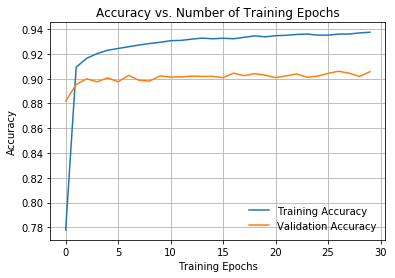

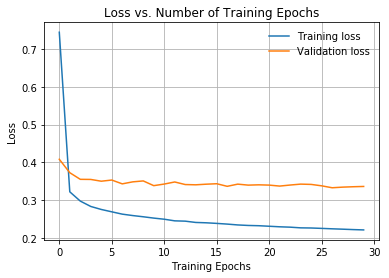

In [12]:
# Plot training and validation curves
plt.figure(0)
plt.title("Accuracy vs. Number of Training Epochs")
plt.xlabel("Training Epochs")
plt.ylabel("Accuracy")
plt.plot(training_acc, label='Training Accuracy')
plt.plot(validation_acc, label='Validation Accuracy')
plt.legend(frameon=False)
plt.grid()
plt.show()

plt.figure(1)
plt.title("Loss vs. Number of Training Epochs")
plt.xlabel("Training Epochs")
plt.ylabel("Loss")
plt.plot(training_loss, label='Training loss')
plt.plot(validation_loss, label='Validation loss')
plt.legend(frameon=False)
plt.grid()
plt.show()